<!-- File automatically generated using DocOnce (https://github.com/doconce/doconce/):
doconce format ipynb kleingordon.do.txt  -->

# Demo - Cubic nonlinear Klein-Gordon equation
**Mikael Mortensen** (email: `mikaem@math.uio.no`), Department of Mathematics, University of Oslo.

Date: **April 13, 2018**

**Summary.** This is a demonstration of how the Python module [shenfun](https://github.com/spectralDNS/shenfun) can be used to solve the time-dependent,
nonlinear Klein-Gordon equation, in a triply periodic domain. The demo is implemented in
a single Python file [KleinGordon.py](https://github.com/spectralDNS/shenfun/blob/master/demo/KleinGordon.py), and it may be run
in parallel using MPI. The Klein-Gordon equation is solved using a mixed
formulation. The discretization, and some background on the spectral Galerkin
method is given first, before we turn to the actual details of the `shenfun`
implementation.

<a id="mov:kleingordon"></a>

<!-- dom:FIGURE: [https://rawgit.com/spectralDNS/spectralutilities/master/movies/KleinGordon.gif] -->
<!-- begin figure -->

<img src="https://rawgit.com/spectralDNS/spectralutilities/master/movies/KleinGordon.gif" ><p style="font-size: 0.9em"><i>Figure 1</i></p>
<!-- end figure -->

Movie showing the evolution of the solution $u$ from the Klein-Gordon equation, in a slice through the center of the domain, computed with the code described in this demo.

## The nonlinear Klein-Gordon equation

The cubic nonlinear Klein-Gordon equation is a wave equation important for many
scientific applications such as solid state physics, nonlinear optics and
quantum field theory [[abdul08]](#abdul08). The equation is given as

<!-- Equation labels as ordinary links -->
<a id="eq:kg"></a>

$$
\begin{equation}
\frac{\partial^2 u}{\partial t^2} = \nabla^2 u - \gamma(u - u|u|^2) \quad
\text{for} \, u \in
\Omega, \label{eq:kg} \tag{1}
\end{equation}
$$

with initial conditions

<!-- Equation labels as ordinary links -->
<a id="eq:init"></a>

$$
\begin{equation}
u(\boldsymbol{x}, t=0) = u^0 \quad \text{and} \quad \frac{\partial u(\boldsymbol{x},
t=0)}{\partial t} = u_t^0. \label{eq:init} \tag{2}
\end{equation}
$$

The spatial coordinates are here denoted as $\boldsymbol{x} = (x, y, z)$, and
$t$ is time. The parameter $\gamma=\pm 1$ determines whether the equations are focusing
($+1$) or defocusing ($-1$) (in the movie we have used $\gamma=1$).
The domain $\Omega=[-2\pi, 2\pi)^3$ is triply
periodic and initial conditions will here be set as

<!-- Equation labels as ordinary links -->
<a id="_auto1"></a>

$$
\begin{equation}
u^0 = 0.1 \exp \left( -\boldsymbol{x} \cdot \boldsymbol{x} \right), 
\label{_auto1} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto2"></a>

$$
\begin{equation}  
u_t^0 = 0.
\label{_auto2} \tag{4}
\end{equation}
$$

We will solve these equations using a mixed formulation and a spectral Galerkin
method. The mixed formulation reads

<!-- Equation labels as ordinary links -->
<a id="eq:df"></a>

$$
\begin{equation}
\frac{\partial f}{\partial t} = \nabla^2 u - \gamma (u - u|u|^2), \label{eq:df} \tag{5}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:du"></a>

$$
\begin{equation}  
\frac{\partial u}{\partial t} = f. \label{eq:du} \tag{6}
\end{equation}
$$

The energy of the solution can be computed as

<!-- Equation labels as ordinary links -->
<a id="_auto3"></a>

$$
\begin{equation}
E(u) = \int_{\Omega} \left( \frac{1}{2} f^2 + \frac{1}{2}|\nabla u|^2 + \gamma(\frac{1}{2}u^2 - \frac{1}{4}u^4) \right) dx
\label{_auto3} \tag{7}
\end{equation}
$$

and it is crucial that this energy remains constant in time.

The movie above is showing the solution $u$, computed with the
code shown below.

## Spectral Galerkin formulation
<a id="sec:specgal"></a>
The PDEs in ([5](#eq:df)) and ([6](#eq:du)) can be solved with many different
numerical methods. We will here use the [shenfun](https://github.com/spectralDNS/shenfun) software and this software makes use of
the spectral Galerkin method. Being a Galerkin method, we need to reshape the
governing equations into proper variational forms, and this is done by
multiplying  ([5](#eq:df)) and ([6](#eq:du)) with the complex conjugate of proper
test functions and then integrating
over the domain. To this end we make use of the triply periodic tensor product
function space $W^{\boldsymbol{N}}(\Omega)$ (defined in Eq. ([14](#eq:kg:Wn)))
and use testfunctions $g \in W^{\boldsymbol{N}}$
with Eq. ([5](#eq:df))  and  $v \in W^{\boldsymbol{N}}$ with Eq. ([6](#eq:du)),
and obtain

<!-- Equation labels as ordinary links -->
<a id="eq:df_var"></a>

$$
\begin{equation}
\frac{\partial}{\partial t} \int_{\Omega} f\, \overline{g}\, w \,d\Omega = \int_{\Omega}
\left(\nabla^2 u - \gamma( u\, - u|u|^2) \right) \overline{g} \, w \,d\Omega, \label{eq:df_var} \tag{8} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:kg:du_var"></a>

$$
\begin{equation}  
\frac{\partial }{\partial t} \int_{\Omega} u\, \overline{v}\, w \, dx =
\int_{\Omega} f\, \overline{v} \, w \, d\Omega. \label{eq:kg:du_var} \tag{9}
\end{equation}
$$

Note that the overline is used to indicate a complex conjugate, and
$w$ is a weight function associated with the test functions. The functions
$f$ and $u$ are now
to be considered as trial functions, and the integrals over the
domain are referred to as inner products. With inner product notation

$$
\left(u, v\right) = \int_{\Omega} u \, \overline{v} \, w\, dx.
$$

and an integration by parts on the Laplacian, the variational problem can be
formulated as:

<!-- Equation labels as ordinary links -->
<a id="eq:df_var2"></a>

$$
\begin{equation}
\frac{\partial}{\partial t} (f, g) = -(\nabla u, \nabla g)
-\gamma \left( u - u|u|^2, g \right), \label{eq:df_var2} \tag{10} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:kg:du_var2"></a>

$$
\begin{equation}  
\frac{\partial }{\partial t} (u, v) = (f, v). \label{eq:kg:du_var2} \tag{11}
\end{equation}
$$

The time and space discretizations are
still left open. There are numerous different approaches that one could take for
discretizing in time, and the first two terms on the right hand side of
([10](#eq:df_var2)) can easily be treated implicitly as well as explicitly. However,
the approach we will follow in Sec. ([Runge-Kutta integrator](#sec:rk)) is a fully explicit 4th order [Runge-Kutta](https://en.wikipedia.org/wiki/Runge-Kutta_methods) method. Also note that
the inner product in the demo will be computed numerically with quadrature
through fast Fourier transforms, and the integrals are thus not computed exactly
for all terms.

## Discretization
To find a numerical solution we need to discretize the continuous problem
([10](#eq:df_var2)) and ([11](#eq:kg:du_var2)) in space as well as time. Since the
problem is triply periodic, Fourier exponentials are normally the best choice
for trial and test functions, and as such we use basis functions

<!-- Equation labels as ordinary links -->
<a id="_auto4"></a>

$$
\begin{equation}
\phi_l(x) = e^{\imath \underline{l} x}, \quad -\infty < l < \infty,
\label{_auto4} \tag{12}
\end{equation}
$$

where $l$ is the wavenumber, and
$\underline{l}=\frac{2\pi}{L}l$ is the scaled wavenumber, scaled with domain
length $L$ (here $4\pi$). Since we want to solve these equations on a computer, we need to choose
a finite number of test functions. A function space $V^N$ can be defined as

<!-- Equation labels as ordinary links -->
<a id="eq:kg:Vn"></a>

$$
\begin{equation}
V^N(x) = \text{span} \{\phi_l(x)\}_{l\in \boldsymbol{l}}, \label{eq:kg:Vn} \tag{13}
\end{equation}
$$

where $N$ is chosen as an even positive integer and $\boldsymbol{l} = -N/2,
-N/2+1, \ldots, N/2-1$. And now, since $\Omega$ is a
three-dimensional domain, we can create tensor products of such bases to get,
e.g., for three dimensions

<!-- Equation labels as ordinary links -->
<a id="eq:kg:Wn"></a>

$$
\begin{equation}
W^{\boldsymbol{N}}(x, y, z) = V^N(x) \otimes V^N(y) \otimes V^N(z), \label{eq:kg:Wn} \tag{14}
\end{equation}
$$

where $\boldsymbol{N} = (N, N, N)$. Obviously, it is not necessary to use the
same number ($N$) of basis functions for each direction, but it is done here
for simplicity. A 3D tensor product basis function is now defined as

<!-- Equation labels as ordinary links -->
<a id="_auto5"></a>

$$
\begin{equation}
\Phi_{lmn}(x,y,z) = e^{\imath \underline{l} x} e^{\imath \underline{m} y}
e^{\imath \underline{n} z} = e^{\imath
(\underline{l}x + \underline{m}y + \underline{n}z)},
\label{_auto5} \tag{15}
\end{equation}
$$

where the indices for $y$- and $z$-direction are $\underline{m}=\frac{2\pi}{L}m,
\underline{n}=\frac{2\pi}{L}n$, and $\boldsymbol{m}$ and $\boldsymbol{n}$ are the same as
$\boldsymbol{l}$ due to using the same number of basis functions for each direction. One
distinction, though, is that for the $z$-direction expansion coefficients are only stored for
$n=0, 1, \ldots, N/2$ due to Hermitian symmetry (real input data). However, for simplicity,
we still write the sum in Eq. ([16](#eq:usg)) over the entire range of basis functions.

We now look for solutions of the form

<!-- Equation labels as ordinary links -->
<a id="eq:usg"></a>

$$
\begin{equation}
u(x, y, z, t) = \sum_{l=-N/2}^{N/2-1}\sum_{m=-N/2}^{N/2-1}\sum_{n=-N/2}^{N/2-1}
\hat{u}_{lmn} (t)\Phi_{lmn}(x,y,z). \label{eq:usg} \tag{16}
\end{equation}
$$

The expansion coefficients $\hat{\boldsymbol{u}} = \{\hat{u}_{lmn}(t)\}_{(l,m,n) \in \boldsymbol{l} \times \boldsymbol{m} \times \boldsymbol{n}}$
can be related directly to the solution $u(x, y, z, t)$ using Fast
Fourier Transforms (FFTs) if we are satisfied with obtaining
the solution in quadrature points corresponding to

<!-- Equation labels as ordinary links -->
<a id="_auto6"></a>

$$
\begin{equation}
 x_i = \frac{4 \pi i}{N}-2\pi \quad \forall \, i \in \boldsymbol{i},
\text{where}\, \boldsymbol{i}=(0,1,\ldots,N-1), 
\label{_auto6} \tag{17}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto7"></a>

$$
\begin{equation}  
 y_j = \frac{4 \pi j}{N}-2\pi \quad \forall \, j \in \boldsymbol{j},
\text{where}\, \boldsymbol{j}=(0,1,\ldots,N-1), 
\label{_auto7} \tag{18}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto8"></a>

$$
\begin{equation}  
 z_k = \frac{4 \pi k}{N}-2\pi \quad \forall \, k \in \boldsymbol{k},
\text{where}\, \boldsymbol{k}=(0,1,\ldots,N-1).
\label{_auto8} \tag{19}
\end{equation}
$$

Note that these points are different from the standard (like $2\pi j/N$) since
the domain
is set to $[-2\pi, 2\pi]^3$ and not the more common $[0, 2\pi]^3$. We have

<!-- Equation labels as ordinary links -->
<a id="eq:uxyz"></a>

$$
\begin{equation}
\boldsymbol{u} = \mathcal{F}_x^{-1}\left(\mathcal{F}_y^{-1}\left(\mathcal{F}_z^{-1}\left(\hat{\boldsymbol{u}}\right)\right)\right) \label{eq:uxyz} \tag{20}
\end{equation}
$$

with $\boldsymbol{u} = \{u(x_i, y_j, z_k)\}_{(i,j,k)\in \boldsymbol{i} \times \boldsymbol{j} \times \boldsymbol{k}}$
and where $\mathcal{F}_x^{-1}$ is the inverse Fourier transform along the direction $x$, for
all indices in the other direction. Note that the three
inverse FFTs are performed sequentially, one direction at the time, and that there is no
scaling factor due to
the definition used for the inverse [Fourier transform](https://mpi4py-fft.readthedocs.io/en/latest/dft.html)

<!-- Equation labels as ordinary links -->
<a id="_auto9"></a>

$$
\begin{equation}
u(x_j) = \sum_{l=-N/2}^{N/2-1} \hat{u}_l e^{\imath \underline{l}
x_j}, \quad \,\, \forall \, j \in \, \boldsymbol{j}.
\label{_auto9} \tag{21}
\end{equation}
$$

Note that this differs from the definition used by, e.g.,
[Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html).

The inner products used in Eqs. ([10](#eq:df_var2)), ([11](#eq:kg:du_var2)) may be
computed using forward FFTs. However, there is a tiny detail that deserves
a comment. The regular Fourier inner product is given as

$$
\int_{0}^{L} e^{\imath \underline{k}x} e^{- \imath \underline{l}x} dx = L\, \delta_{kl}
$$

where a weight function is chosen as $w(x) = 1$ and $\delta_{kl}$ equals unity
for $k=l$ and zero otherwise. In Shenfun we choose instead to use a weight
function $w(x)=1/L$, such that the weighted inner product integrates to
unity:

$$
\int_{0}^{L} e^{\imath \underline{k}x} e^{- \imath \underline{l}x} \frac{1}{L} dx = \delta_{kl}.
$$

With this weight function the (discrete) scalar product and the forward transform
are the same and we obtain:

<!-- Equation labels as ordinary links -->
<a id="_auto10"></a>

$$
\begin{equation}
\left(u, v \right) = \boldsymbol{\hat{u}} =
\left(\frac{1}{N}\right)^3
\mathcal{F}_z\left(\mathcal{F}_y\left(\mathcal{F}_x\left(\boldsymbol{u}\right)\right)\right).
\label{_auto10} \tag{22}
\end{equation}
$$

From this we see that the variational forms ([10](#eq:df_var2)) and ([11](#eq:kg:du_var2))
may be written in terms of the Fourier transformed quantities $\hat{\boldsymbol{u}}$ and
$\hat{\boldsymbol{f}}$. Expanding the exact derivatives of the nabla operator, we have

<!-- Equation labels as ordinary links -->
<a id="_auto11"></a>

$$
\begin{equation}
(\nabla u, \nabla v) =
\left((\underline{l}^2+\underline{m}^2+\underline{n}^2)\hat{u}_{lmn}\right), 
\label{_auto11} \tag{23}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto12"></a>

$$
\begin{equation}  
(u, v) = \left(\hat{u}_{lmn}\right), 
\label{_auto12} \tag{24}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto13"></a>

$$
\begin{equation}  
(u|u|^2, v) = \left(\widehat{u|u|^2}_{lmn}\right)
\label{_auto13} \tag{25}
\end{equation}
$$

where the indices on the right hand side run over $(l, m, n) \in \boldsymbol{l} \times \boldsymbol{m} \times \boldsymbol{n}$.
The equations to be solved for each wavenumber can now be found directly as

<!-- Equation labels as ordinary links -->
<a id="eq:df_var3"></a>

$$
\begin{equation}
\frac{\partial \hat{f}_{lmn}}{\partial t}  =
\left(-(\underline{l}^2+\underline{m}^2+\underline{n}^2+\gamma)\hat{u}_{lnm} + \gamma \widehat{u|u|^2}_{lnm}\right), \label{eq:df_var3} \tag{26} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:kg:du_var3"></a>

$$
\begin{equation}  
\frac{\partial \hat{u}_{lnm}}{\partial t} = \hat{f}_{lnm}. \label{eq:kg:du_var3} \tag{27}
\end{equation}
$$

There is more than one way to arrive at these equations. Taking the 3D Fourier
transform of both equations  ([5](#eq:df)) and ([6](#eq:du)) is one obvious way.
With the Python module [shenfun](https://github.com/spectralDNS/shenfun), one can work with the
inner products as seen in ([10](#eq:df_var2)) and ([11](#eq:kg:du_var2)), or the Fourier
transforms directly. See for example Sec. [Runge-Kutta integrator](#sec:rk) for how $(\nabla u, \nabla
v)$ can be
implemented.  In short, [shenfun](https://shenfun.readthedocs.io/en/latest/shenfun.html#module-shenfun) contains all the tools required to work with
the spectral Galerkin method, and we will now see how [shenfun](https://shenfun.readthedocs.io/en/latest/shenfun.html#module-shenfun) can be used to solve
the Klein-Gordon equation.

For completion, we note that the discretized problem to solve can be formulated
with the Galerkin method as:
for all $t>0$, find $(f, u) \in W^N \times W^N$  such that

<!-- Equation labels as ordinary links -->
<a id="eq:dff"></a>

$$
\begin{equation}
\frac{\partial}{\partial t} (f, g) = -(\nabla u, \nabla g)
-\gamma \left( u - u|u|^2, g \right) \quad \forall \, g \in W^{N}, \label{eq:dff} \tag{28} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:kg:duu"></a>

$$
\begin{equation}  
\frac{\partial }{\partial t} (u, v) = (f, v) \quad \forall \, v \in W^N. \label{eq:kg:duu} \tag{29}
\end{equation}
$$

where $u(x, y, z, 0)$ and $f(x, y, z, 0)$ are given as the initial conditions
according to Eq. ([2](#eq:init)).

## Implementation

To solve the Klein-Gordon equations we need to make use of the Fourier function
spaces defined in
[shenfun](https://shenfun.readthedocs.io/en/latest/shenfun.html#module-shenfun), and these are found in submodule
[shenfun.fourier.bases](https://shenfun.readthedocs.io/en/latest/shenfun.fourier.html#module-shenfun.fourier.bases).
The triply periodic domain allows for Fourier in all three directions, and we
can as such create one instance of this space using [FunctionSpace()](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.FunctionSpace) with
family ``Fourier``
for each direction. However, since the initial data are real, we
can take advantage of Hermitian symmetries and thus make use of a
real to complex class for one (but only one) of the directions, by specifying
``dtype='d'``. We can only make use of the
real-to-complex class for the direction that we choose to transform first with the forward
FFT, and the reason is obviously that the output from a forward transform of
real data is now complex. We may start implementing the solver as follows

In [1]:
from shenfun import *
import numpy as np
import sympy as sp

# Set size of discretization
N = (32, 32, 32)

# Defocusing or focusing
gamma = 1

rank = comm.Get_rank()

# Create function spaces
K0 = FunctionSpace(N[0], 'F', domain=(-2*np.pi, 2*np.pi), dtype='D')
K1 = FunctionSpace(N[1], 'F', domain=(-2*np.pi, 2*np.pi), dtype='D')
K2 = FunctionSpace(N[2], 'F', domain=(-2*np.pi, 2*np.pi), dtype='d')

We now have three instances `K0`, `K1` and `K2`, corresponding to the space
([13](#eq:kg:Vn)), that each can be used to solve
one-dimensional problems. However, we want to solve a 3D problem, and for this
we need a tensor product space, like ([14](#eq:kg:Wn)), created as a tensor
product of these three spaces

In [2]:
T = TensorProductSpace(comm, (K0, K1, K2), **{'planner_effort':
                                              'FFTW_MEASURE'})

Here the `planner_effort`, which is a flag used by [FFTW](http://www.fftw.org), is optional. Possibel choices are from the list
(`FFTW_ESTIMATE`, `FFTW_MEASURE`, `FFTW_PATIENT`, `FFTW_EXHAUSTIVE`), and the
flag determines how much effort FFTW puts in looking for an optimal algorithm
for the current platform. Note that it is also possible to use FFTW [wisdom](http://www.fftw.org/fftw3_doc/Wisdom.html#Wisdom) with
`shenfun`, and as such, for production, one may perform exhaustive planning once
and then simply import the result of that planning later, as wisdom.

The [TensorProductSpace](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.tensorproductspace.TensorProductSpace) instance `T` contains pretty much all we need for
computing inner products or fast transforms between real and wavenumber space.
However, since we are going to solve for a mixed system, it is convenient to also use the
[CompositeSpace](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.tensorproductspace.CompositeSpace) class

In [3]:
TT = CompositeSpace([T, T])
TV = VectorSpace(T)

Here the space `TV` will be used to compute gradients, which
explains why it is a vector.

We need containers for the solution as well as intermediate work arrays for,
e.g., the Runge-Kutta method. Arrays are created using
[Sympy](http://www.sympy.org/en/index.html) for
initialization. Below `f` is initialized to 0,
whereas `u = 0.1*sp.exp(-(x**2 + y**2 + z**2))`.

In [4]:
# Use sympy to set up initial condition
x, y, z = sp.symbols("x,y,z", real=True)
ue = 0.1*sp.exp(-(x**2 + y**2 + z**2))

fu = Array(TT, buffer=(0, ue)) # Solution array in physical space
f, u = fu                # Split solution array by creating two views u and f
dfu = Function(TT)       # Array for right hand sides
df, du = dfu             # Split into views
Tp = T.get_dealiased((1.5, 1.5, 1.5))
up = Array(Tp)           # Work array

fu_hat = Function(TT)    # Solution in spectral space
fu_hat = fu.forward()
f_hat, u_hat = fu_hat

gradu = Array(TV)        # Solution array for gradient

The [Array](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.Array) class is a subclass of Numpy's [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html),
without much more functionality than constructors that return arrays of the
correct shape according to the basis used in the construction. The
[Array](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.Array) represents the left hand side of ([16](#eq:usg)),
evaluated on the quadrature mesh. A different type
of array is returned by the [Function](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.Function)
class, that subclasses both Nympy's ndarray as well as an internal
[BasisFunction](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.BasisFunction)
class. An instance of the [Function](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.Function) represents the entire
spectral Galerkin function ([16](#eq:usg)).

### Runge-Kutta integrator

<a id="sec:rk"></a>

We use an explicit fourth order Runge-Kutta integrator,
imported from [shenfun.utilities.integrators](https://shenfun.readthedocs.io/en/latest/shenfun.utilities.html#module-shenfun.utilities.integrators). The solver
requires one function to compute nonlinear terms,
and one to compute linear. But here we will make
just one function that computes both, and call it
`NonlinearRHS`:

In [5]:
uh = TrialFunction(T)
vh = TestFunction(T)
L = inner(grad(vh), -grad(uh)) + [inner(vh, -gamma*uh)]
L = la.SolverDiagonal(L).mat.scale

def NonlinearRHS(self, fu, fu_hat, dfu_hat, **par):
    global count, up
    dfu_hat.fill(0)
    f_hat, u_hat = fu_hat
    df_hat, du_hat = dfu_hat
    up = Tp.backward(u_hat, up)
    df_hat = Tp.forward(gamma*up**3, df_hat)
    df_hat += L*u_hat
    du_hat[:] = f_hat
    return dfu_hat

Note that `L` now is an array that represents the linear
coefficients in ([27](#eq:kg:du_var3)).

All that is left is to write a function that is called
on each time step, which will allow us to store intermediate
solutions, compute intermediate energies, and plot
intermediate solutions. Since we will plot the same plot
many times, we create the figure first, and then simply update
the plotted arrays in the `update` function.

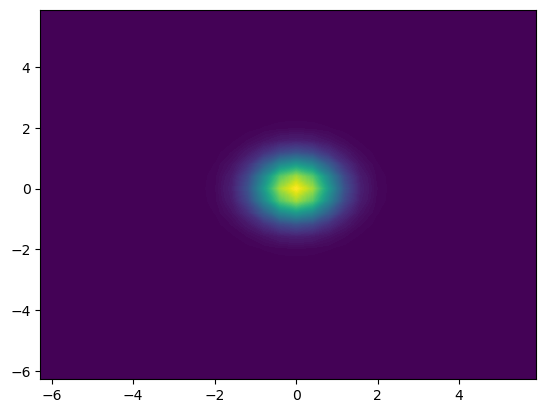

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
X = T.local_mesh(True)
if rank == 0:
    plt.figure()
    image = plt.contourf(X[1][..., 0], X[0][..., 0], u[..., N[2]//2], 100)
    plt.draw()
    plt.pause(1e-6)

The actual `update` function is

In [7]:
# Get wavenumbers
K = np.array(T.local_wavenumbers(True, True, True))

def update(self, fu, fu_hat, t, tstep, **params):
    global gradu

    transformed = False
    if rank == 0 and tstep % params['plot_tstep'] == 0 and params['plot_tstep'] > 0:
        fu = fu_hat.backward(fu)
        f, u = fu[:]
        self.image = plt.contourf(X[1][..., 0], X[0][..., 0], u[..., N[2]//2], 100)
        display(self.image, clear=True)
        plt.pause(1e-6)
        transformed = True

    if tstep % params['Compute_energy'] == 0:
        if transformed is False:
            fu = fu_hat.backward(fu)
        f, u = fu
        f_hat, u_hat = fu_hat
        ekin = 0.5*energy_fourier(f_hat, T)
        es = 0.5*energy_fourier(1j*(K*u_hat), T)
        eg = gamma*np.sum(0.5*u**2 - 0.25*u**4)/np.prod(np.array(N))
        eg = comm.allreduce(eg)
        gradu = TV.backward(1j*(K[0]*u_hat[0]+K[1]*u_hat[1]+K[2]*u_hat[2]), gradu)
        ep = comm.allreduce(np.sum(f*gradu)/np.prod(np.array(N)))
        ea = comm.allreduce(np.sum(np.array(X)*(0.5*f**2 + 0.5*gradu**2 - (0.5*u**2 - 0.25*u**4)*f))/np.prod(np.array(N)))
        if rank == 0:
            params['energy'][0] += "Time = %2.2f Total energy = %2.8e Linear momentum %2.8e Angular momentum %2.8e \n" %(t, ekin+es+eg, ep, ea)
            print(params['energy'][0])
        comm.barrier()

With all functions in place, the actual integrator
can be created and called as

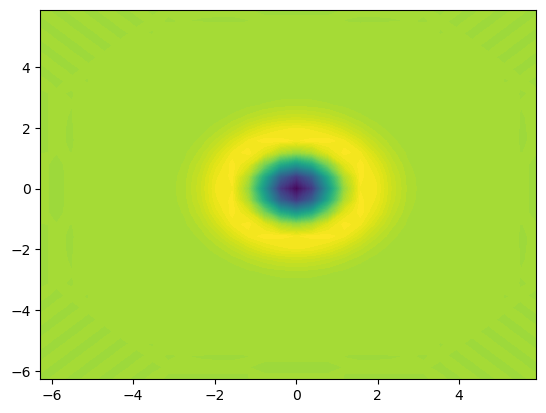

Time = 0.05 Total energy = 1.98329923e-05 Linear momentum 6.42238800e-24 Angular momentum -2.92145793e-04 
Time = 0.10 Total energy = 1.98329923e-05 Linear momentum 1.31556755e-23 Angular momentum -2.80169377e-04 
Time = 0.15 Total energy = 1.98329923e-05 Linear momentum 2.04511117e-23 Angular momentum -2.61131233e-04 
Time = 0.20 Total energy = 1.98329923e-05 Linear momentum 2.83829882e-23 Angular momentum -2.36332458e-04 
Time = 0.25 Total energy = 1.98329923e-05 Linear momentum 3.67386534e-23 Angular momentum -2.07437862e-04 
Time = 0.30 Total energy = 1.98329923e-05 Linear momentum 4.48989055e-23 Angular momentum -1.76338524e-04 
Time = 0.35 Total energy = 1.98329923e-05 Linear momentum 5.17647244e-23 Angular momentum -1.45000052e-04 
Time = 0.40 Total energy = 1.98329923e-05 Linear momentum 5.58193938e-23 Angular momentum -1.15311113e-04 
Time = 0.45 Total energy = 1.98329923e-05 Linear momentum 5.53440577e-23 Angular momentum -8.89461368e-05 
Time = 0.50 Total energy = 1.98329923

In [8]:
par = {'Compute_energy': 10,
       'plot_tstep': 10,
       'end_time': 1}
dt = 0.005
integrator = RK4(TT, N=NonlinearRHS, update=update, energy=[""], **par)
integrator.setup(dt)
fu_hat = integrator.solve(fu, fu_hat, dt, (0, par['end_time']))

A complete solver is found [here](https://github.com/spectralDNS/shenfun/blob/master/demo/KleinGordon.py).

<!-- ======= Bibliography ======= -->

1. <a id="abdul08"></a> **A.-M. Wazwaz**.  New Travelling Wave Solutions to the Boussinesq and the Klein-Gordon Equations, *Communications in Nonlinear Science and Numerical Simulation*, 13(5), pp. 889-901, [doi: 10.1016/j.cnsns.2006.08.005](https://dx.doi.org/10.1016/j.cnsns.2006.08.005), 2008.